In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

In [5]:
dataInfo = pd.read_csv('data-dictionary.csv')
dataInfo

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [6]:
countriesData = pd.read_csv('Country-data.csv')
countriesData

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [29]:
countriesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [30]:
countriesData.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
countriesData.nlargest(5, ['gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000


In [10]:
countriesData.nsmallest(5, ['gdpp'])


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [11]:
countriesData.nlargest(5, ['child_mort'])


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [12]:
countriesData.nsmallest(5, ['child_mort'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100


In [13]:
countriesData.nlargest(5, ['income'])


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [14]:
countriesData.nsmallest(5, ['income'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446


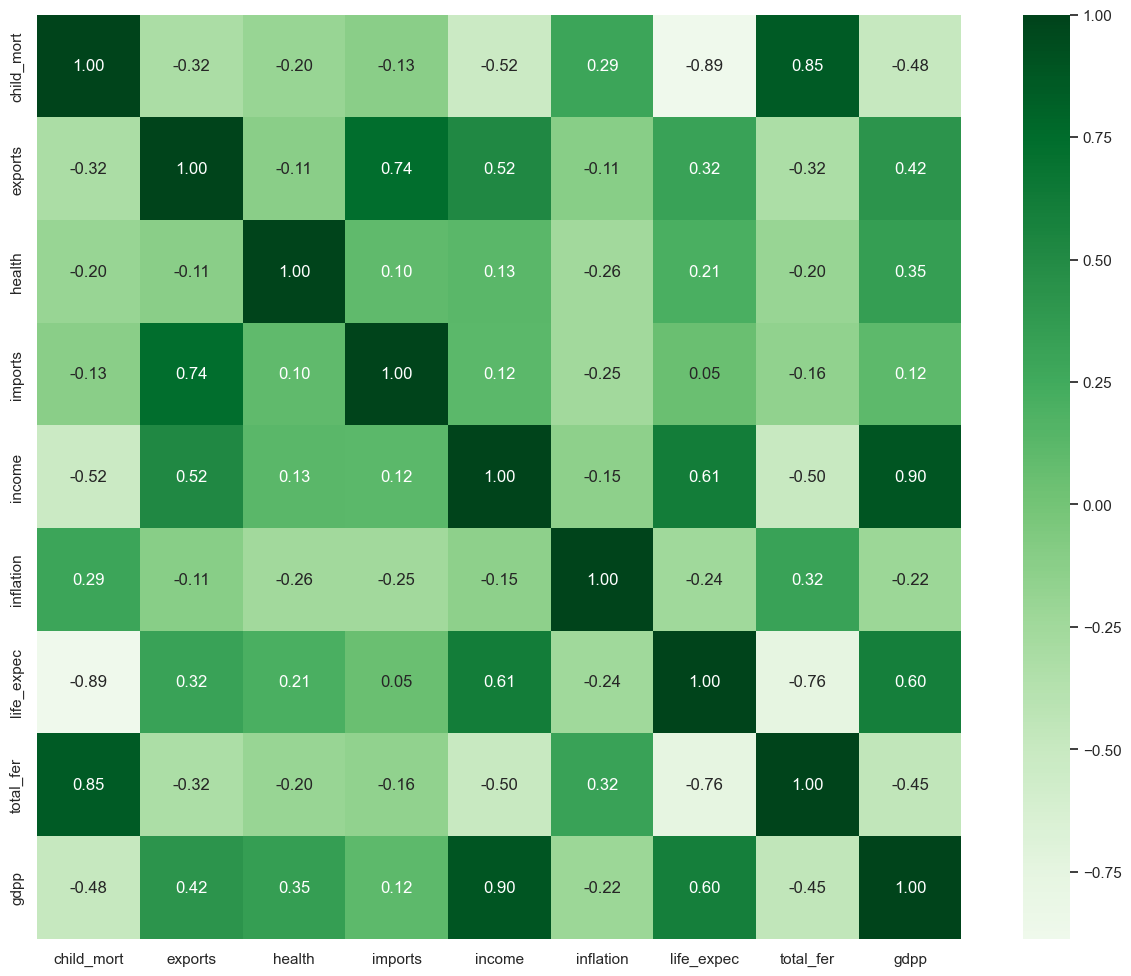

In [31]:
corrs = countriesData.corr()
plt.figure(figsize=(16,12))
cmap = sns.color_palette("Greens", as_cmap=True)
h1 = sns.heatmap(corrs, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)


<AxesSubplot: xlabel='health', ylabel='Count'>

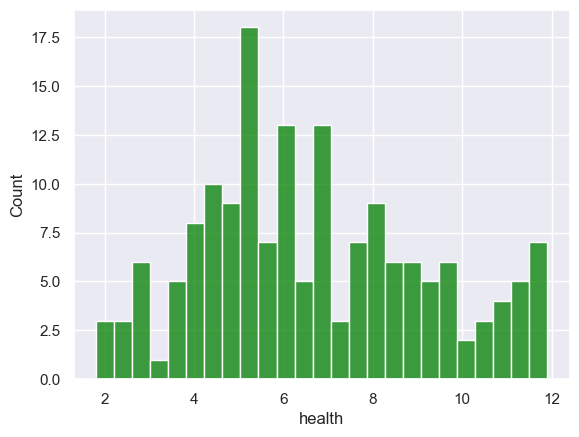

In [16]:

healthData = countriesData[countriesData['health']<12]
sns.set(style="darkgrid")
sns.histplot(data=healthData, x='health', color="green", bins = 25)

<AxesSubplot: xlabel='inflation', ylabel='Count'>

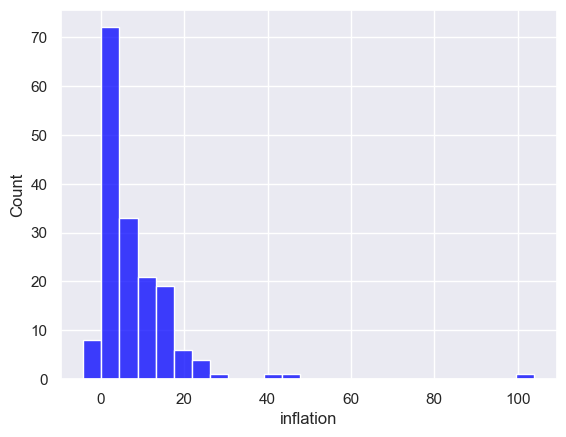

In [17]:

inflData = countriesData['inflation']
sns.set(style="darkgrid")
sns.histplot(data=inflData, color="blue", bins = 25)



<AxesSubplot: xlabel='gdpp', ylabel='Count'>

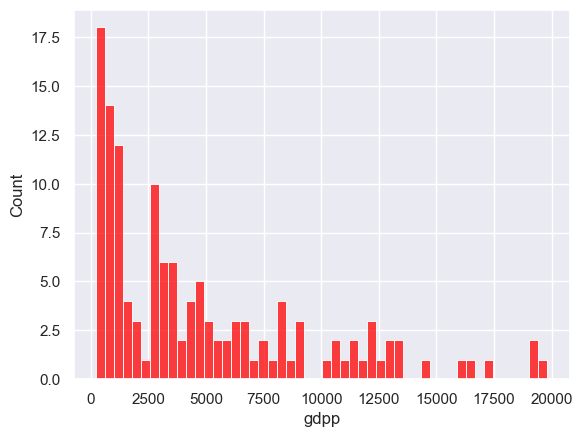

In [32]:

gdppData = countriesData[countriesData['gdpp'] < 20000]
sns.histplot(data=gdppData, x="gdpp", color="red", bins = 50)



<AxesSubplot: xlabel='child_mort', ylabel='total_fer'>

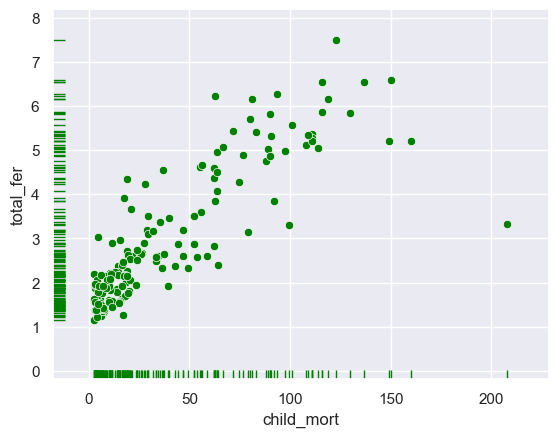

In [33]:
sns.scatterplot(data = countriesData, x = "child_mort", y = "total_fer", color = 'green')
sns.rugplot(data = countriesData, x = "child_mort", y = "total_fer", color = 'green')



<AxesSubplot: xlabel='life_expec', ylabel='child_mort'>

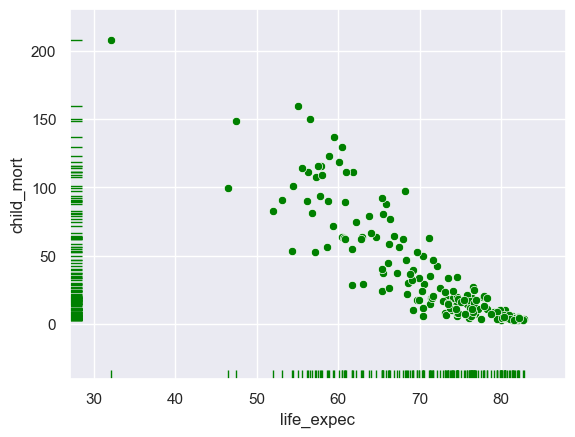

In [34]:
sns.scatterplot(data = countriesData, x = "life_expec", y = "child_mort", color = 'green')
sns.rugplot(data = countriesData, x = "life_expec", y = "child_mort", color = 'green')



<AxesSubplot: xlabel='gdpp', ylabel='income'>

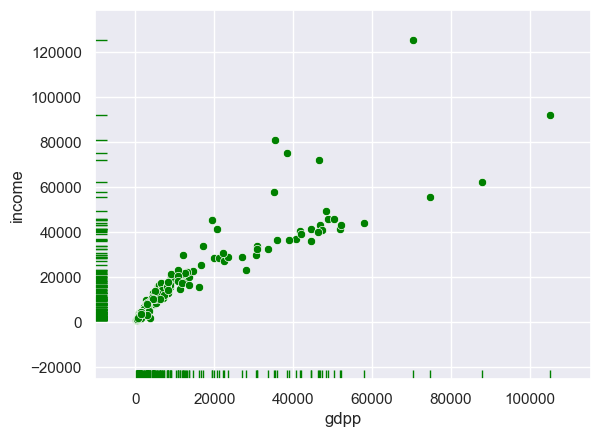

In [35]:

sns.scatterplot(data = countriesData, x = "gdpp", y = "income", color = 'green')
sns.rugplot(data = countriesData, x = "gdpp", y = "income", color = 'green')



<AxesSubplot: xlabel='exports', ylabel='imports'>

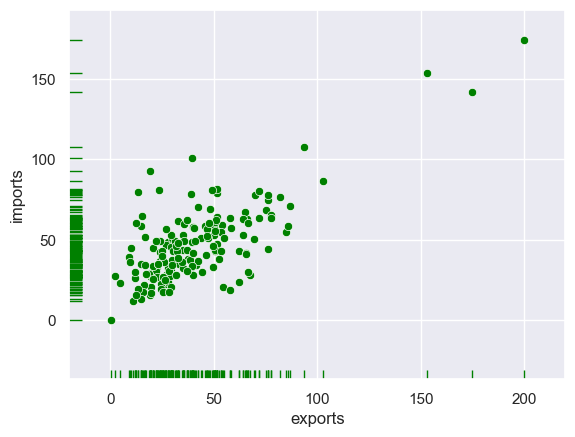

In [36]:

sns.scatterplot(data = countriesData, x = "exports", y = "imports", color = 'green')
sns.rugplot(data = countriesData, x = "exports", y = "imports", color = 'green')




<AxesSubplot: xlabel='life_expec', ylabel='gdpp'>

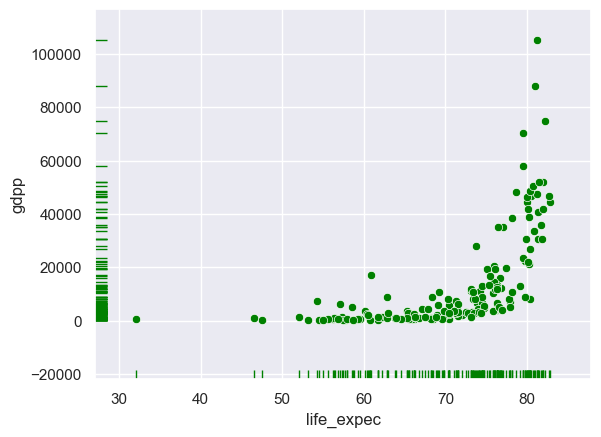

In [37]:


sns.scatterplot(data = countriesData, x = "life_expec", y = "gdpp", color = 'green')
sns.rugplot(data = countriesData, x = "life_expec", y = "gdpp", color = 'green')




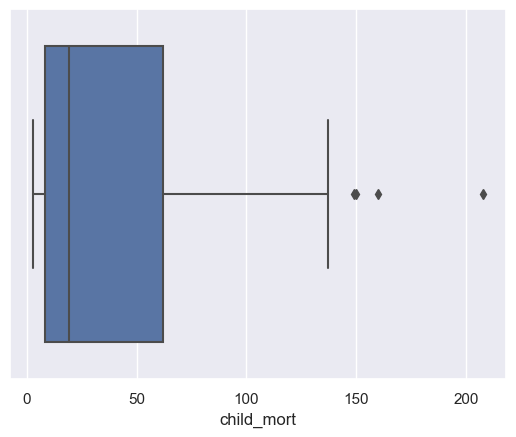

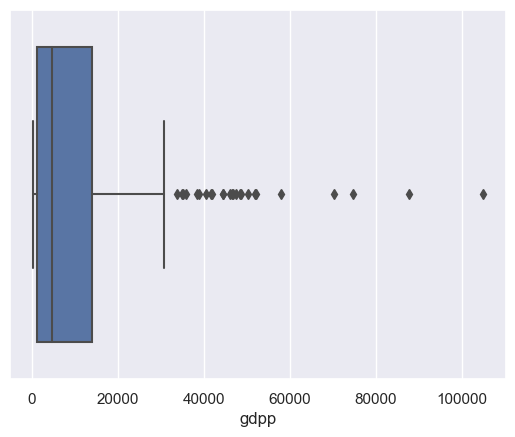

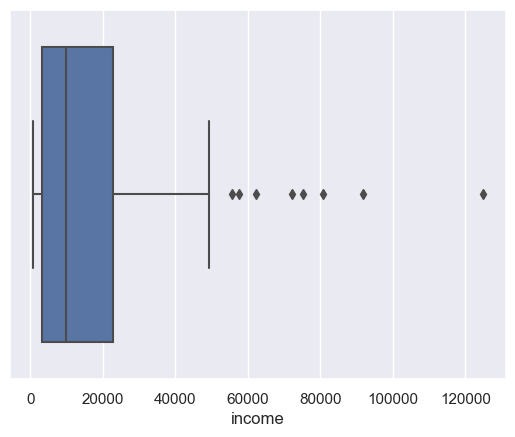

In [38]:
fig = plt.figure()
sns.boxplot(x=countriesData['child_mort'])
plt.show()
sns.boxplot(x=countriesData['gdpp'])
plt.show()
sns.boxplot(x=countriesData['income'])
plt.show()

In [39]:
clearData = countriesData[["country",'gdpp','child_mort','income']]
clearData = clearData[clearData['gdpp'] < 30000]
clearData = clearData[clearData['child_mort'] < 140]
clearData = clearData[clearData['income'] < 50000]
clearData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     135 non-null    object 
 1   gdpp        135 non-null    int64  
 2   child_mort  135 non-null    float64
 3   income      135 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.3+ KB


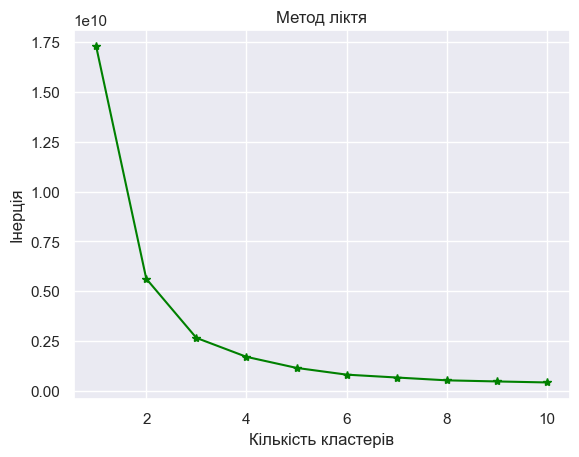

In [40]:
klst = list(zip(clearData["gdpp"], clearData["income"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klst)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='*', color = 'green')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()



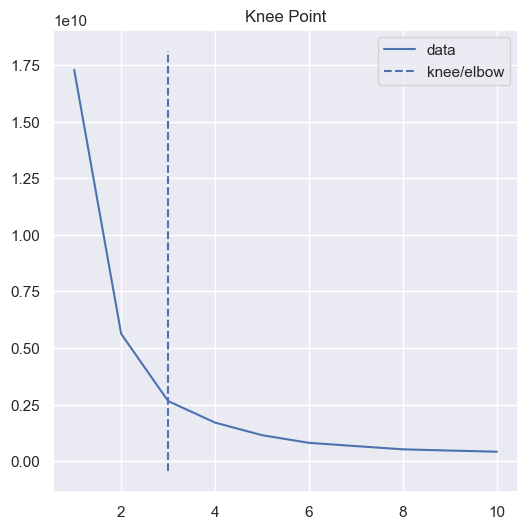

In [41]:

from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
kl.plot_knee()


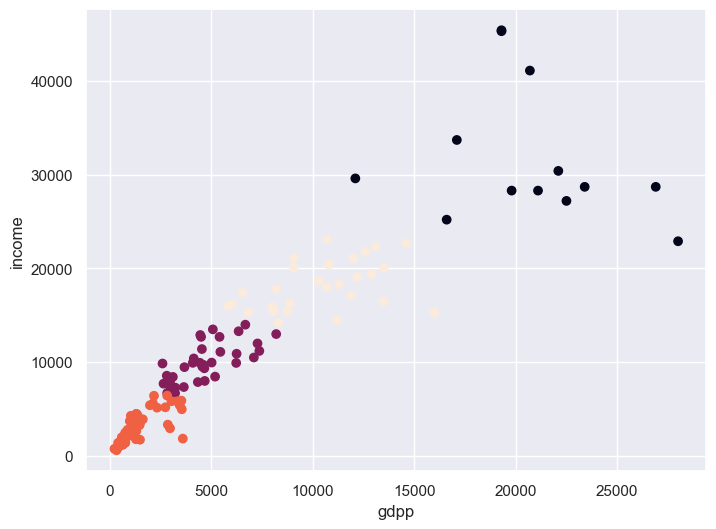

In [42]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(klst)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(clearData["gdpp"], clearData["income"], c=kmeans.labels_)
ax.set_xlabel('gdpp')
ax.set_ylabel('income')
plt.show()

In [43]:

clearData.nsmallest(10, ['income', 'gdpp'])


,country,gdpp,child_mort,income
37,"Congo, Dem. Rep.",334,116.0,609
88,Liberia,327,89.3,700
26,Burundi,231,93.6,764
112,Niger,348,123.0,814
106,Mozambique,419,101.0,918
94,Malawi,459,90.5,1030
63,Guinea,648,109.0,1190
150,Togo,488,90.3,1210
126,Rwanda,563,63.6,1350
93,Madagascar,413,62.2,1390


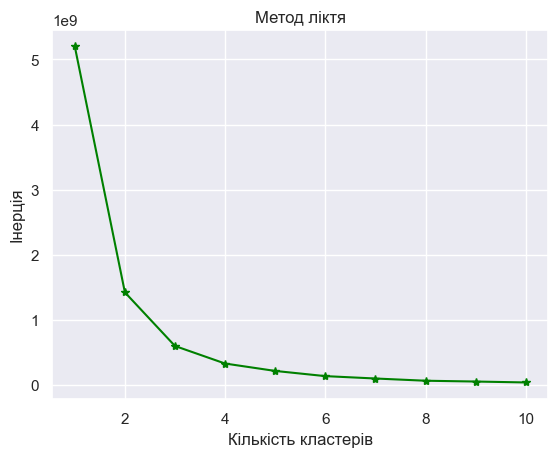

In [44]:
klst2 = list(zip(clearData["gdpp"], clearData["child_mort"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klst2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='*', color='green')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

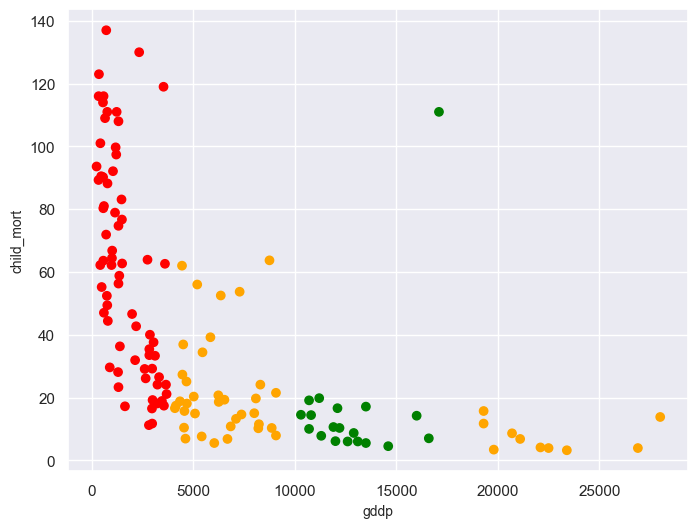

In [46]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(klst2)
customcmap = ListedColormap(["red", "green", "orange"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(clearData["gdpp"], clearData["child_mort"], c=kmeans.labels_, cmap = customcmap)
ax.set_xlabel('gddp', fontsize=10)
ax.set_ylabel('child_mort', fontsize=10)
plt.show()

In [47]:
CI = clearData[['child_mort', 'gdpp']].copy()
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(CI)
cluster_labels = gmm_model.predict(CI)
CI = pd.DataFrame(CI)
CI['cluster'] = cluster_labels

Text(0.5, 0, 'gdpp')

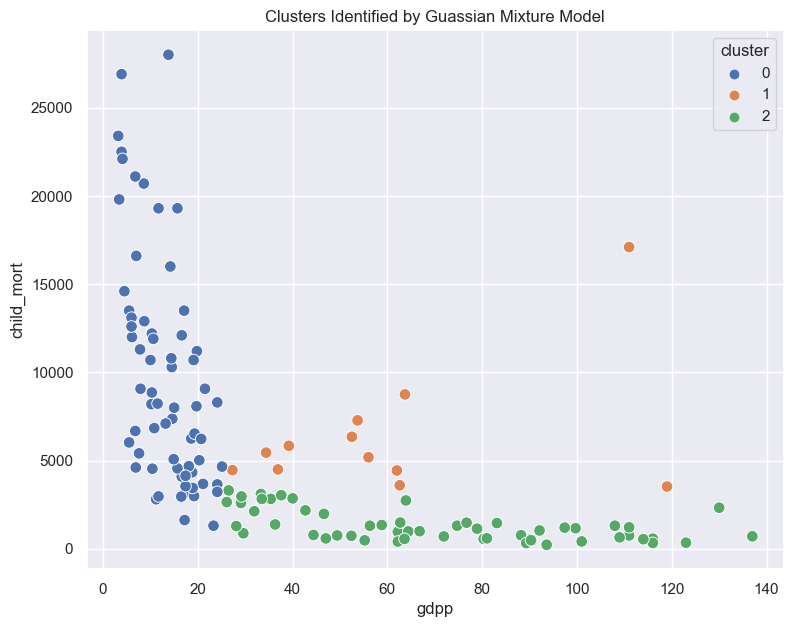

In [48]:

fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(x='child_mort', y='gdpp', data=CI, hue='cluster', palette="deep", s=70, ax = ax) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('child_mort')
plt.xlabel('gdpp')


In [49]:
badCount = clearData[["country"]]
badCount=pd.merge(badCount,CI, left_index=True,right_index=True)
badCount.nsmallest(5, ['gdpp', 'child_mort'])

,country,child_mort,gdpp,cluster
26,Burundi,93.6,231,2
88,Liberia,89.3,327,2
37,"Congo, Dem. Rep.",116.0,334,2
112,Niger,123.0,348,2
93,Madagascar,62.2,413,2


In [50]:
badCount['cluster'].value_counts(normalize=True)


0    0.496296
2    0.414815
1    0.088889
Name: cluster, dtype: float64

In [51]:

Cluster_child_mort=pd.DataFrame(CI.groupby(["cluster"]).child_mort.mean())
Cluster_income=pd.DataFrame(CI.groupby(["cluster"]).gdpp.mean())
CMI = pd.concat([Cluster_child_mort,Cluster_income], axis=1)
CMI.columns = ["child_mort","gdpp"]
CMI


,child_mort,gdpp
cluster,,
0,13.397015,9798.805970
1,59.858333,6374.166667
2,70.876786,1301.785714


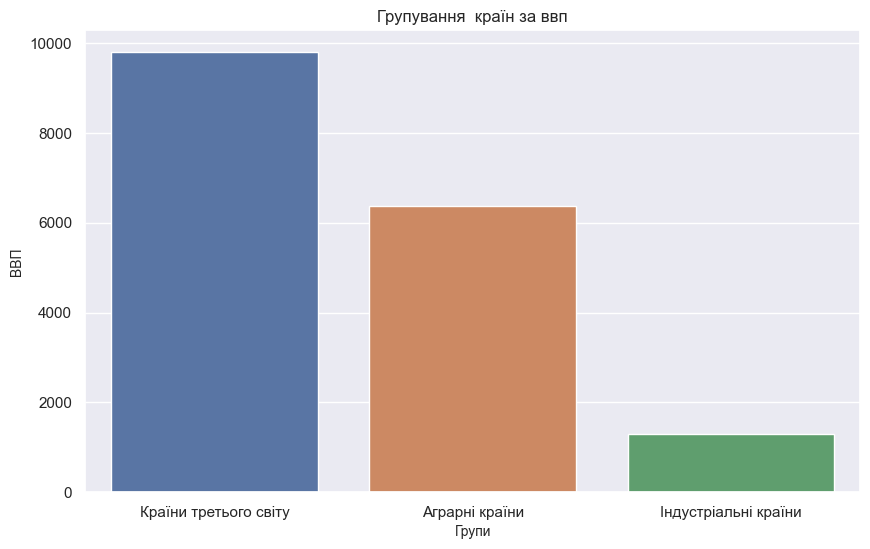

In [52]:

fig = plt.figure(figsize = (10,6))
CMI.rename(index={2: 'Індустріальні країни'},inplace=True)
CMI.rename(index={1: 'Аграрні країни'},inplace=True)
CMI.rename(index={0: 'Країни третього світу'},inplace=True)
s=sns.barplot(x=CMI.index,y='gdpp',data=CMI)
plt.xlabel('Групи', fontsize=10)
plt.ylabel('ВВП', fontsize=10)
plt.title('Групування  країн за ввп')
plt.show()

In [53]:
CI = clearData[['child_mort', 'income']].copy()
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(CI)
cluster_labels = gmm_model.predict(CI)
CI = pd.DataFrame(CI)
CI['cluster'] = cluster_labels

Text(0.5, 0, 'income')

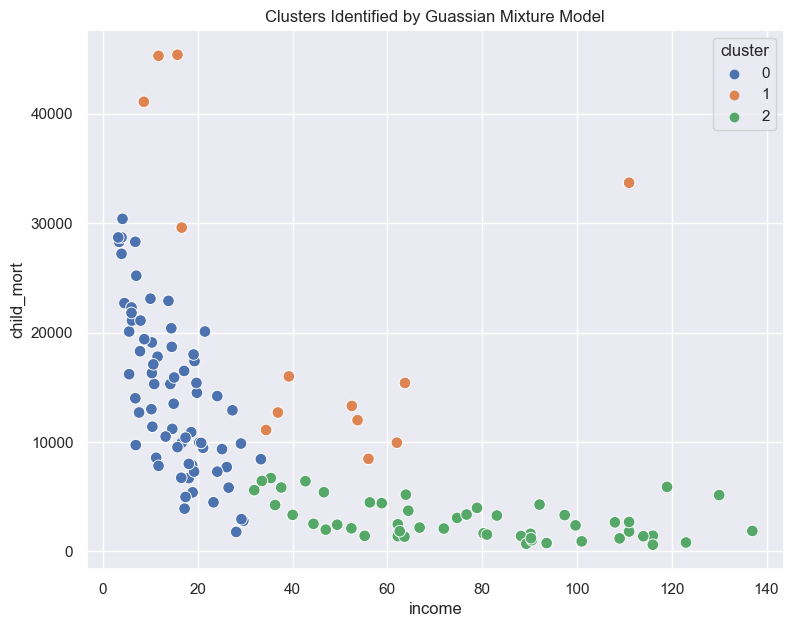

In [54]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(x='child_mort', y='income', data=CI, hue='cluster', palette="deep", s=70, ax = ax) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('child_mort')
plt.xlabel('income')


In [55]:

badCount['cluster'].value_counts(normalize=True)


0    0.496296
2    0.414815
1    0.088889
Name: cluster, dtype: float64

In [56]:
Cluster_child_mort=pd.DataFrame(CI.groupby(["cluster"]).child_mort.mean())
Cluster_income=pd.DataFrame(CI.groupby(["cluster"]).income.mean())
CMI = pd.concat([Cluster_child_mort,Cluster_income], axis=1)
CMI.columns = ["child_mort","income"]
CMI

,child_mort,income
cluster,,
0,15.129577,14252.676056
1,43.230769,22615.384615
2,77.427451,2850.686275


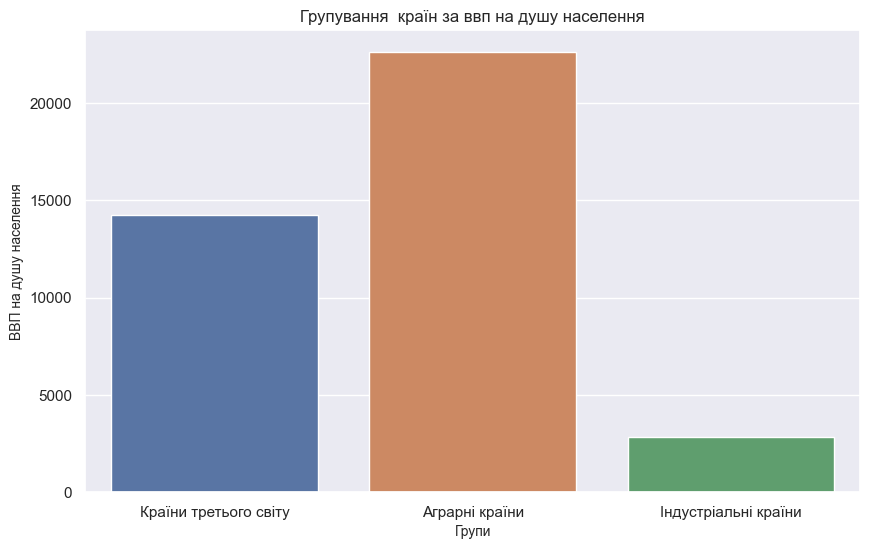

In [57]:

fig = plt.figure(figsize = (10,6))
CMI.rename(index={2: 'Індустріальні країни'},inplace=True)
CMI.rename(index={1: 'Аграрні країни'},inplace=True)
CMI.rename(index={0: 'Країни третього світу'},inplace=True)
s=sns.barplot(x=CMI.index,y='income',data=CMI)
plt.xlabel('Групи', fontsize=10)
plt.ylabel('ВВП на душу населення', fontsize=10)
plt.title('Групування  країн за ввп на душу населення')
plt.show()